<a href="https://colab.research.google.com/github/Maruf346/AI-ML-with-python/blob/main/Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**XOR Classification Using MLP from scratch**

In [ ]:
import numpy as np

def sigmoid(x):
  return np.tanh(x)

def sigmoid_derivative(x):
  return 1 - np.tanh(x) ** 2

class MLP:
  def __init__(self, input_size, hidden_size, output_size, learning_rate = 0.1):
    self.lr = learning_rate

    #weight initialization
    self.w1 = np.random.randn(input_size, hidden_size)
    self.b1 = np.zeros((1, hidden_size))
    self.w2 = np.random.randn(hidden_size, output_size)
    self.b2 = np.zeros((1, output_size))

  def forward(self, x):
    self.z1 = np.dot(x, self.w1) + self.b1
    self.a1 = sigmoid(self.z1)
    self.z2 = np.dot(self.a1, self.w2) + self.b2
    self.a2 = sigmoid(self.z2)

    return self.a2

  def backward(self, x, y, output):
    m = x.shape[0]

    dz2 = (output - y) * sigmoid_derivative(self.z2)
    dw2 = np.dot(self.a1.T, dz2) / m
    db2 = np.sum(dz2, axis = 0, keepdims = True) / m

    dz1 = np.dot(dz2, self.w2.T) * sigmoid_derivative(self.z1)
    dw1 = np.dot(x.T, dz1) / m
    db1 = np.sum(dz1, axis = 0, keepdims = True) / m

    self.w1 -= self.lr * dw1
    self.b1 -= self.lr * db1
    self.w2 -= self.lr * dw2
    self.b2 -= self.lr * db2

  def train(self, x, y, epochs):
    for epoch in range(epochs):
      output = self.forward(x)
      self.backward(x, y, output)
      if epoch % 100 == 0:
        loss = np.mean((output - y) ** 2)
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

  def predict(self, x):
    output = self.forward(x)
    return np.round(output)

# XOR dataset
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Initialize and train MLP
mlp = MLP(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1)
mlp.train(x, y, epochs=2000)

# Test predictions
predictions = mlp.predict(x)
print("\nPredictions for XOR:")
for i in range(len(x)):
  print(f"{x[i]} => {int(predictions[i][0])}")



Epoch 0, Loss: 0.455025
Epoch 100, Loss: 0.166641
Epoch 200, Loss: 0.089031
Epoch 300, Loss: 0.042722
Epoch 400, Loss: 0.022757
Epoch 500, Loss: 0.014000
Epoch 600, Loss: 0.009617
Epoch 700, Loss: 0.007132
Epoch 800, Loss: 0.005580
Epoch 900, Loss: 0.004538
Epoch 1000, Loss: 0.003799
Epoch 1100, Loss: 0.003251
Epoch 1200, Loss: 0.002832
Epoch 1300, Loss: 0.002502
Epoch 1400, Loss: 0.002236
Epoch 1500, Loss: 0.002018
Epoch 1600, Loss: 0.001836
Epoch 1700, Loss: 0.001682
Epoch 1800, Loss: 0.001551
Epoch 1900, Loss: 0.001437

Predictions for XOR:
[0 0] => 0
[0 1] => 1
[1 0] => 1
[1 1] => 0


# **XOR Classification Using MLP (using scikit-learn) on manual dataset**

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# manual dataset...
X = np.array([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1],
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0]
])

# Target: output = 1 if exactly two inputs are 1; else 0...
y = np.array([0, 1, 1, 1, 0, 0, 0, 0])

# Splitting... (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=99
)

#Modeling and traininggg...
mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='tanh', max_iter=5000, random_state=1)
mlp.fit(X_train, y_train)

# Prediction...
train_preds = mlp.predict(X_train)
test_preds = mlp.predict(X_test)

print("Train Predictions:")
for i in range(len(X_train)):
    print(f"{X_train[i]} => {train_preds[i]} (Expected: {y_train[i]})")

print("\nTest Predictions:")
for i in range(len(X_test)):
    print(f"{X_test[i]} => {test_preds[i]} (Expected: {y_test[i]})")

# Accuracy
print("\nTrain Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy:", accuracy_score(y_test, test_preds))


Train Predictions:
[1 1 1] => 0 (Expected: 0)
[0 0 1] => 0 (Expected: 0)
[0 0 0] => 0 (Expected: 0)
[0 1 0] => 0 (Expected: 0)
[1 1 0] => 1 (Expected: 1)
[0 1 1] => 1 (Expected: 1)

Test Predictions:
[1 0 0] => 0 (Expected: 0)
[1 0 1] => 0 (Expected: 1)

Train Accuracy: 1.0
Test Accuracy: 0.5


# **Experiment with different numbers of layers and the number of neurons to find your solutions and report your results.**


--- Configuration ---
Hidden Layers      : 1
Neurons per Layer  : 2
Train Accuracy     : 0.8333
Test Accuracy      : 0.5000

--- Configuration ---
Hidden Layers      : 1
Neurons per Layer  : 4
Train Accuracy     : 1.0000
Test Accuracy      : 0.5000

--- Configuration ---
Hidden Layers      : 1
Neurons per Layer  : 6
Train Accuracy     : 1.0000
Test Accuracy      : 0.5000

--- Configuration ---
Hidden Layers      : 1
Neurons per Layer  : 8
Train Accuracy     : 1.0000
Test Accuracy      : 0.5000

--- Configuration ---
Hidden Layers      : 2
Neurons per Layer  : 2
Train Accuracy     : 0.8333
Test Accuracy      : 0.0000

--- Configuration ---
Hidden Layers      : 2
Neurons per Layer  : 4
Train Accuracy     : 1.0000
Test Accuracy      : 0.5000

--- Configuration ---
Hidden Layers      : 2
Neurons per Layer  : 6
Train Accuracy     : 1.0000
Test Accuracy      : 0.5000

--- Configuration ---
Hidden Layers      : 2
Neurons per Layer  : 8
Train Accuracy     : 1.0000
Test Accuracy      : 0.5000


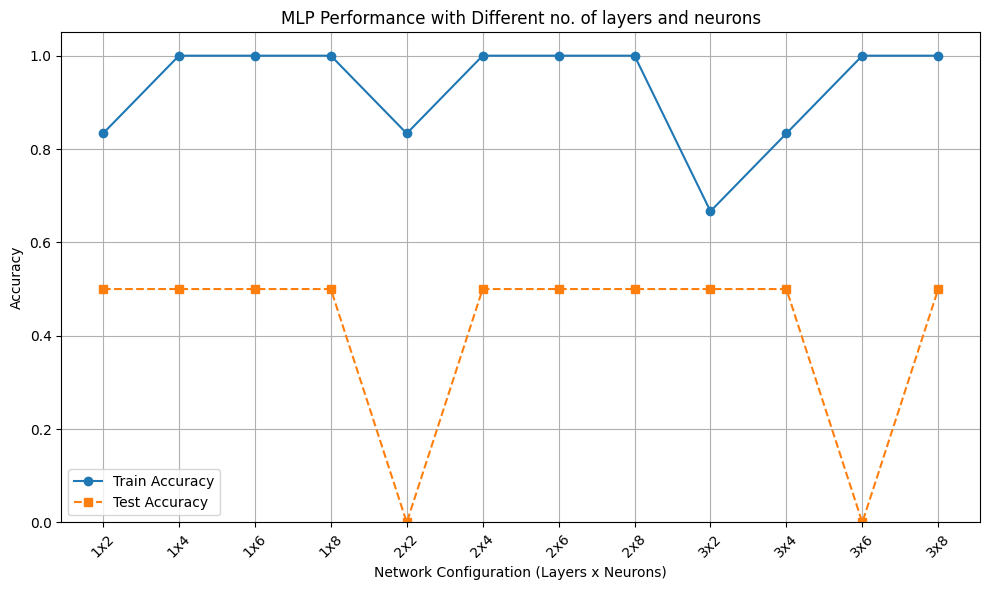

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Manual dataset
X = np.array([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1],
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0]
])

# Target: output = 1 if exactly two inputs are 1; else 0
y = np.array([0, 1, 1, 1, 0, 0, 0, 0])

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=99
)

# --- Prepare to store results ---
configs = []
train_accuracies = []
test_accuracies = []

# Loop through different configurations
for num_hidden_layers in [1, 2, 3]:             # Try 1, 2, 3 layers
    for neurons_per_layer in [2, 4, 6, 8]:      # Try 2, 4, 6, 8 neurons per layer
        # Create hidden layer tuple like (4,), (4, 4), (4, 4, 4)
        hidden_layer_sizes = tuple([neurons_per_layer] * num_hidden_layers)

        # Initialize and train the MLP
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation='tanh',
            max_iter=5000,
            random_state=1
        )
        mlp.fit(X_train, y_train)

        # Predict on train and test sets
        train_preds = mlp.predict(X_train)
        test_preds = mlp.predict(X_test)

        # Accuracy
        train_acc = accuracy_score(y_train, train_preds)
        test_acc = accuracy_score(y_test, test_preds)

        config_name = f"{num_hidden_layers}x{neurons_per_layer}"
        configs.append(config_name)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        # Output the results
        print("\n--- Configuration ---")
        print(f"Hidden Layers      : {num_hidden_layers}")
        print(f"Neurons per Layer  : {neurons_per_layer}")
        print(f"Train Accuracy     : {train_acc:.4f}")
        print(f"Test Accuracy      : {test_acc:.4f}")

# --- Plot the results ---
plt.figure(figsize=(10, 6))
plt.plot(configs, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(configs, test_accuracies, marker='s', linestyle='--', label='Test Accuracy')
plt.xlabel("Network Configuration (Layers x Neurons)")
plt.ylabel("Accuracy")
plt.title("MLP Performance with Different no. of layers and neurons")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
